# 01wk-1: 박스플랏, 히스토그램

최규빈  
2023-09-04

> 박스플랏, 히스토그램

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/01wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-xu-VBEDlCghcRN597zuzf2&si=qdvpuPqisXinq3vz>

# 2. Import

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
#!pip install opencv-python
import cv2 

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (3, 2)  # 가로 6, 세로 4 크기의 그림
matplotlib.rcParams['figure.dpi'] = 150

# 3. Boxplot

## A. motivating example

`-` 통계란?

`-` 평균 좋아해요?

**`# 예제1` – 전북고등학교: 평균은 좋은 측정값인가?**

`-` 전북고등학교에서 통계학을 수업하는 A선생님과 B선생님의 있다.

In [3]:
y1=[75,75,76,76,77,77,78,79,79,98] # A선생님에게 통계학을 배운 학생의 점수들
y2=[76,76,77,77,78,78,79,80,80,81] # B선생님에게 통계학을 배운 학생의 점수들 

`-` 어떤반이 더 공부를 잘할까?, 누가 더 잘 가르칠까?

In [4]:
np.mean(y1)

In [5]:
np.mean(y2)

`-` 의사결정: A선생님에게 배운 학생들의 평균이 더 높다. -\> A선생님이 더
강의를 잘 하셨다?

`-` 반론: 평균은 A반(=A선생님에게 통계학을 배운 반)이 더 높다. 그런데
98점을 받은 학생이 A반에 포함되어서 A반이 전체평균이 높게 나온것이고
나머지 학생들은 전체적으로 B반 학생들이 더 시험을 잘 보았다고 해석할 수
있다.

`-` 교훈: 단순한 평균비교보다 학생들이 받은 점수의 분포를 비교해보는
것이 중요하다. 분포를 살펴보는 방법 중 유용한 방법이 박스플랏이다.

`#`

## B. matplotlib으로 boxplot 그리기

`-` A반 학생들의 박스플랏 그리기

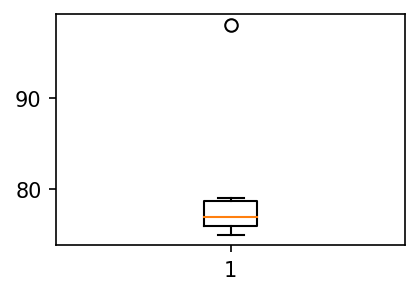

In [6]:
plt.boxplot(y1);

`-` B반 학생들의 박스플랏 그리기

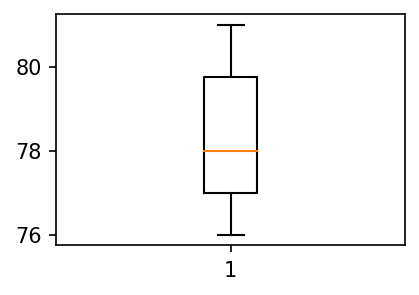

In [7]:
plt.boxplot(y2);

`-` A반 학생들의 점수와 B반 학생들의 점수를 나란히 박스플랏으로 그리자.

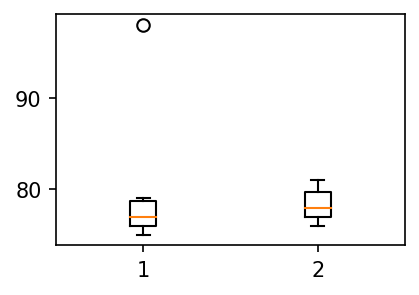

In [8]:
plt.boxplot([y1,y2]);

## C. boxplot이란?

`-` Galarnyk (2023)

-   <https://github.com/mGalarnyk/Python_Tutorials/blob/master/Statistics/boxplot/box_plot.ipynb>

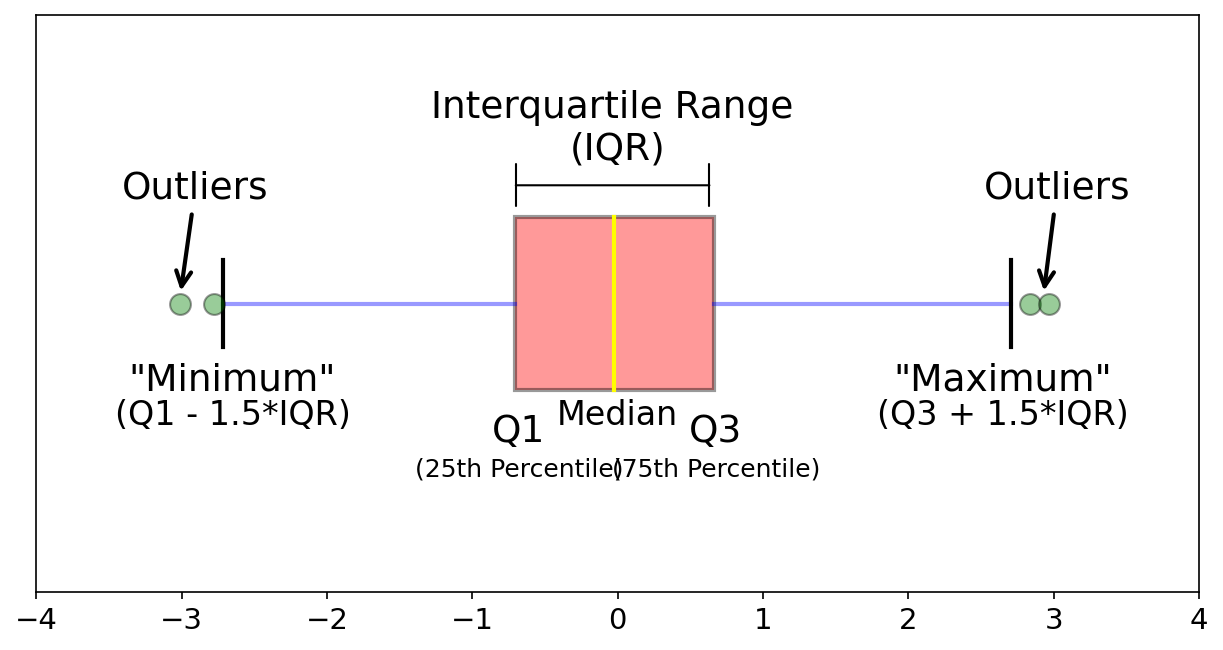

In [9]:
np.random.seed(916170)

# connection path is here: https://stackoverflow.com/questions/6146290/plotting-a-line-over-several-graphs
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5))

# rectangular box plot
bplot = axes.boxplot(s,
                vert=False,
                patch_artist=True, 
                showfliers=True, # This would show outliers (the remaining .7% of the data)
                positions = [0],
                boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'red', alpha = .4),
                medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                whiskerprops = dict(linestyle='-', linewidth=2, color='Blue', alpha = .4),
                capprops = dict(linestyle='-', linewidth=2, color='Black'),
                flierprops = dict(marker='o', markerfacecolor='green', markersize=10,
                  linestyle='none', alpha = .4),
                widths = .3,
                zorder = 1)   

axes.set_xlim(-4, 4)
plt.xticks(fontsize = 14)

axes.set_yticks([])
axes.annotate(r'',
            xy=(-.73, .205), xycoords='data',
            xytext=(.66, .205), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3")
            );

axes.text(0, .25, "Interquartile Range \n(IQR)",  horizontalalignment='center', fontsize=18)
axes.text(0, -.21, r"Median", horizontalalignment='center', fontsize=16);
axes.text(2.65, -.15, "\"Maximum\"", horizontalalignment='center', fontsize=18);
axes.text(-2.65, -.15, "\"Minimum\"", horizontalalignment='center', fontsize=18);
axes.text(-.68, -.24, r"Q1", horizontalalignment='center', fontsize=18);
axes.text(-2.65, -.21, r"(Q1 - 1.5*IQR)", horizontalalignment='center', fontsize=16);
axes.text(.6745, -.24, r"Q3", horizontalalignment='center', fontsize=18);
axes.text(.6745, -.30, r"(75th Percentile)", horizontalalignment='center', fontsize=12);
axes.text(-.68, -.30, r"(25th Percentile)", horizontalalignment='center', fontsize=12);
axes.text(2.65, -.21, r"(Q3 + 1.5*IQR)", horizontalalignment='center', fontsize=16);

axes.annotate('Outliers', xy=(2.93,0.015), xytext=(2.52,0.20), fontsize = 18,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center');

axes.annotate('Outliers', xy=(-3.01,0.015), xytext=(-3.41,0.20), fontsize = 18,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center');

-   가장 큰 값이 100%, 가장 작은 값이 0%, 중간값이 50%

## D. boxplot을 언제 쓰면 좋을까?

`-` 박스플랏의 장점: 단순히 평균을 주는 것보다 데이터를 파악하고 직관을
얻기에 유리하다.

`-` 박스플랏이 이용되는 범위:

-   첫 데이터 분석때 자료 분포를 파악하기 용이
-   Kaggel등의 대회참여시, 두 개 이상의 모형의 성능을 비교

# 4. Histogram

## A. motivating example

`-` 전북고예제에서 우리의 소망: “A반 B반 중에 어떤 반이 공부를 더
잘하냐?”, “A선생님과 B선생님 중 어떤 분의 강의가 효과적이었다고 평할 수
있는가?” 와 같은 단순한 질문에 대한 대답

-   보통 이러한 질문은 **중심경향값** 중 하나를 골라서 비교하면 되었다.
-   여기에서 **중심경향값**이란 데이터 분포의 중심을 보여주는 값으로
    자료 전체를 대표할 수 있는 값을 말함. 평균, 중앙값등이 대표적인
    중심경향값이다.

`-` 전북고예제에서는 “A반 B반 중에서 어떤 반이 공부를 더 잘하냐?” 라는
질문의 대답으로 단순평균비교로는 의미가 없었다. 오히려 결과론적으로 보면
중앙값이 더 타당해 보인다.

`-` 그런데 사실 생각해보면 중앙값을 기준으로 B반이 공부를 더 잘했다고
주장하는 것도 애매하다. 어쨌든 가장 공부잘한 학생은 A반에 있으니까!

-   에이 한명 뿐이잖아요? 라고 생각할 수 있는데 그 한명이 2명 3명으로
    점점 늘어난다고 생각해보자, 합리적인 기준을 제시할 수 있는가?
-   그리고 A반을 지도한 선생님이 영재를 지도하는데 특화된 선생님일수도
    있잖아요?

`-` 사실 “A반 B반중에 누가 더 공부를 잘하냐?” 라는 질문은 굉장히
대답하기 곤란한 질문이다. 왜냐하면

-   이슈1: 단순 평균비교로 이러한 질문에 답을 하기 어렵다.
-   이슈2: 박스플랏으로 전체분포를 파악해도 어떠한 반이 더 공부를
    잘한다는 기준을 잡는게 애매하다.

`-` **그런데 특수한 경우에는 “A반 B반중에 누가 더 공부를 잘하냐?” 라는
질문에 대한 대답을 깔끔하게 할 수 있다.**

**`# 예제2` – 정규분포 전북고등학교: 평균은 좋은 측정값인가?**

`-` A반과 B반의 통계학 성적이 아래와 같다고 하자.

In [10]:
np.random.seed(43052)
y1 = np.random.randn(10000)
y2 = np.random.randn(10000) + 0.5 

In [11]:
np.mean(y1),np.mean(y2)

In [12]:
np.mean(y2) - np.mean(y1)

y2의 값이 y1의 값보다 전체적으로 0.5097056259662253 정도 높다고 볼 수
있다?

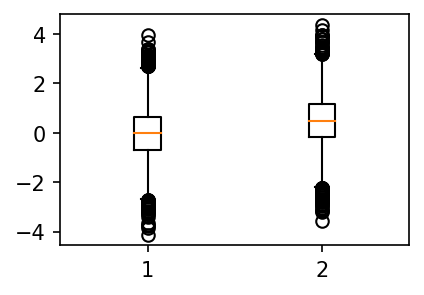

In [13]:
plt.boxplot([y1,y2]);

-   분포의 모양이 거의 비슷, 왼쪽그림을 컨트롤+C 하여 오른쪽에 붙인다음
    0.5정도 y축으로 올린느낌이다!

`-` 여기에서는 “B반의 성적 $\approx$ A반의 성적 + 0.5” 라고 주장해도 큰
무리가 없어보인다. 따라서 이 경우에는 “A반 B반 중에 어떤반이 더 공부를
잘하냐?” 라는 질문에 대하여 “B반이 평균적으로 0.5점정도 더 공부를
잘합니다” 라고 대답해도 괜찮다.

-   이 예제에서는 우연히 극단적인 학생이 없었음.
-   그렇지만 혹시 극단적인 학생이 나온다면? 걱징X. 너무 극단적인 값이
    많이 나오면 정규분포가 아님 + 만약에 어떠한 반에서 극단적인 학생이
    나온다면 똑같은 확률로 다른반 역시 그러한 극단적 학생이 나올 것

`-` 결론: 정규분포 분포가정을 한다면 이슈1,2에 대한 문제를 한번에
해결가능 함

`#`

`-` 정규분포가정은 어떻게 할 수 있나? (= 데이터를 보고 어떻게
정규분포라고 알 수 있는가?): 데이터의 히스토그램을 그려서 종 모양이
되는지 확인해본다.[1]

## B. histogram 이란?

`-` 히스토그램: X축이 변수의 구간, Y축은 그 구간에 포함된 빈도를
의미하는 그림

## C. histogram 그리기

`-` 히스토그램의 예시1 – 기본플랏, `;`으로 결과 생략하기

[1] 아직 초보단계라서 이것밖에 모를 수 있어요

In [14]:
y=[10,11,12,15,16,20,21,22,23,24,25]

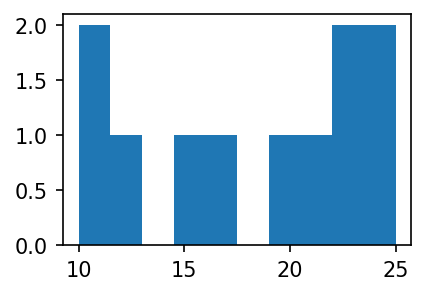

In [15]:
plt.hist(y)

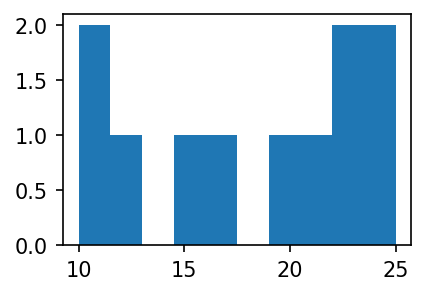

In [16]:
plt.hist(y,bins=10)

`-` 히스토그램 예시2 – bins 옵션이용

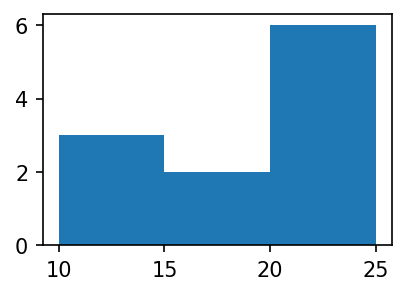

In [17]:
plt.hist(y,bins=3)

`-` 히스토그램 예시3 – bins=3 옵션의 결과값 해석

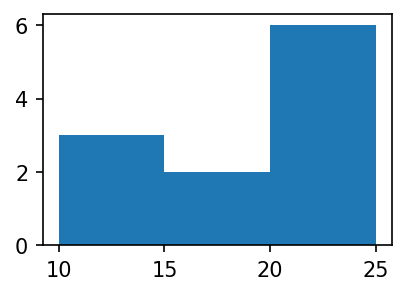

In [18]:
plt.hist(y,bins=3)

-   가장 큰 값은 25, 가장 작은 값은 10이므로 range는 15이다.
-   range / bins = 15 / 3 = 5 이므로 각 구간의 간격은 5이다.
-   구간은 \[10,15), \[15,20), \[20,25\] 로 나눈다.
-   각 구간에 포함된 자료의 수는 3,2,6 이다.

`-` 히스토그램 예시4 – bins=7 옵션의 결과값 해석

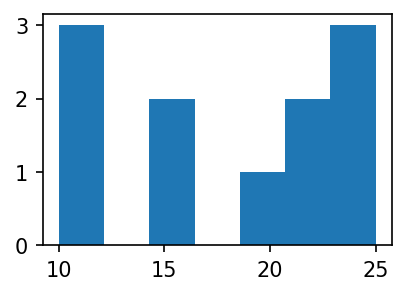

In [19]:
plt.hist(y,bins=7) 

-   가장 큰 값은 25, 가장 작은 값은 10이므로 range는 15이다.
-   range / bins = 15 / 7 = 2.142857142857143 이므로 각 구간의 간격은
    2.142857142857143이다.
-   구간은 \[10,12.14285714), \[12.14285714,14.28571429,),
    \[22.85714286,25\] 로 나눈다.
-   각 구간에 포함된 자료의 수는 3,0,2,0,1,2,3 이다.

`-` 히스토그램 예시5 – range 옵션

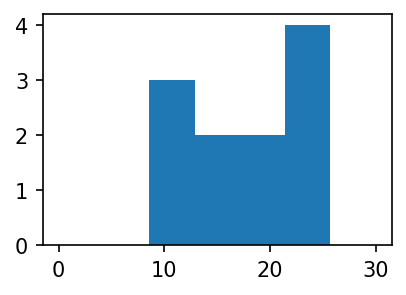

In [20]:
plt.hist(y,bins=7,range=[0,30]) # range를 변경하면 --> 구간도 달라짐

`-` 히스토그램 예시6 – 나란히 그리기

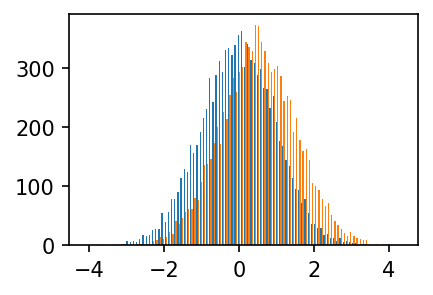

In [182]:
np.random.seed(43052)
y1 = np.random.randn(10000)
y2 = np.random.randn(10000) + 0.5 
plt.hist([y1,y2],bins=100);

# 5. Histogram equalization

## A. 예비학습1: 이미지자료 다운로드

`-` ref: <https://en.wikipedia.org/wiki/Histogram_equalization>

In [129]:
!wget https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg
img = cv2.imread('Unequalized_Hawkes_Bay_NZ.jpg')
!rm Unequalized_Hawkes_Bay_NZ.jpg

--2023-09-04 11:59:07--  https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110895 (108K) [image/jpeg]
Saving to: ‘Unequalized_Hawkes_Bay_NZ.jpg’

Unequalized_Hawkes_ 100%[===================>] 108.30K   572KB/s    in 0.2s    

2023-09-04 11:59:07 (572 KB/s) - ‘Unequalized_Hawkes_Bay_NZ.jpg’ saved [110895/110895]


-   `!wget 주소`: 주소에 있는 이미지를 다운로드
-   `!rm 파일이름`: 현재폴더에 “파일이름”을 삭제

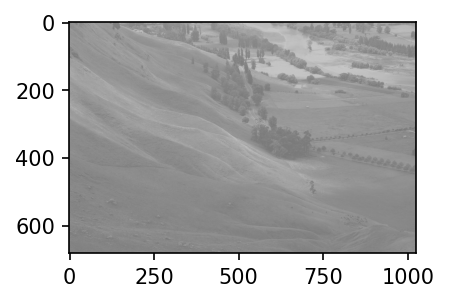

In [131]:
plt.imshow(img)

-   다운받은 이미지를 보는 방법

## B. 예비학습2: 이미지자료의 이해

### 비밀1: 이미지는 사실 숫자들의 집합이었음.

`-` 예시1 – 2d array = 흑백이미지

In [5]:
_img1 = np.array([0,30,90,120,150,180,210,240,255]).reshape(3,3)
_img1

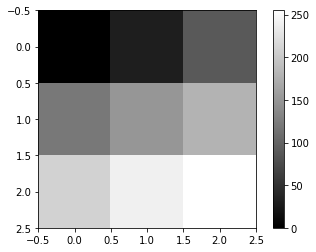

In [6]:
plt.imshow(_img1,cmap='gray')
plt.colorbar()

`-` 예시2 – 2d array = 흑백이미지

In [7]:
_img2 = np.array([0,20,40,60,80,100,120,140,160]).reshape(3,3)
_img2

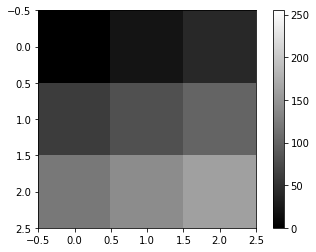

In [8]:
plt.imshow(_img2,cmap='gray',vmin=0,vmax=255)
plt.colorbar()

`-` 예시3 – 나란히 그리기

In [9]:
_img3 = np.concatenate([_img1,_img2],axis=1)
_img3

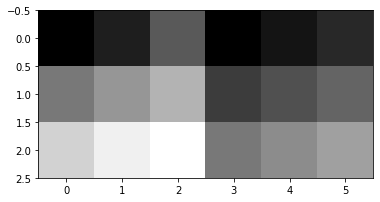

In [10]:
plt.imshow(_img3,cmap='gray')

### 비밀2: 칼라이미지는 red + green + blue 의 조합으로 표현가능 (다른방식도 가능)

`-` ref: <https://en.wikipedia.org/wiki/RGB_color_model>

![그림 ??: 위키에서 긁은 그림, 빛의 3원색을 표현하고
있음](https://upload.wikimedia.org/wikipedia/commons/thumb/5/59/RGB_combination_on_wall.png/440px-RGB_combination_on_wall.png)

`-` 예시1 – 3d array = 칼라이미지

In [21]:
r = np.array(
    [[  0,   0,   0,   0,   0],
     [  0,   0,   0,   0,   0],
     [255, 255, 255, 255, 255],
     [255, 255, 255, 255, 255],
     [255, 255, 255, 255, 255]]
)
g = np.array(
    [[255, 255, 255,  0,   0],
     [255, 255, 255,  0,   0],
     [255, 255, 255,  0,   0],
     [  0,   0,   0,  0,   0],
     [  0,   0,   0,  0,   0]]
)
b = np.array(
    [[  0,   0, 255, 255, 255],
     [  0,   0, 255, 255, 255],
     [  0,   0, 255, 255, 255],
     [  0,   0,   0,   0,   0],
     [  0,   0,   0,   0,   0]]
)
z = np.array(
    [[ 0,  0,  0,  0,  0],
     [ 0,  0,  0,  0,  0],
     [ 0,  0,  0,  0,  0],
     [ 0,  0,  0,  0,  0],
     [ 0,  0,  0,  0,  0]]
)    

In [22]:
red = np.stack([r,z,z],axis=-1)
green = np.stack([z,g,z],axis=-1)
blue = np.stack([z,z,b],axis=-1)

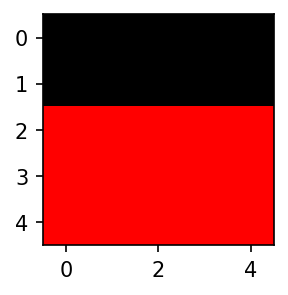

In [23]:
plt.imshow(red)

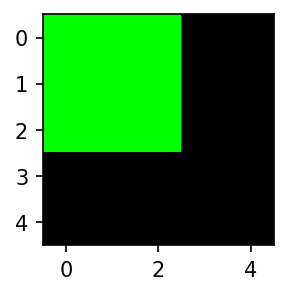

In [24]:
plt.imshow(green)

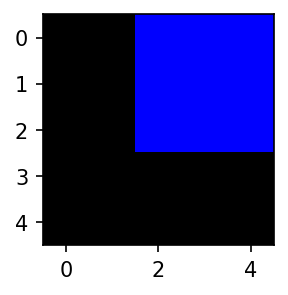

In [25]:
plt.imshow(blue)

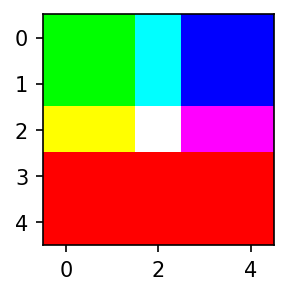

In [26]:
plt.imshow(red+green+blue)

`-` 예시2: R,G,B를 같은 비율로 섞으면 다시 흑백이미지가 된다.

In [143]:
arr2 = np.array(
    [[10,  40],
     [80,  60]]
)
arr2

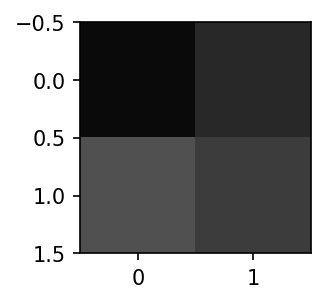

In [144]:
arr3 = np.stack([arr2,arr2,arr2],axis=-1)
plt.imshow(arr3)

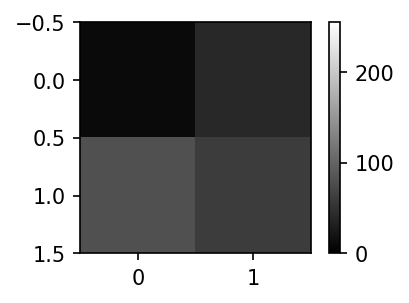

In [147]:
plt.imshow(arr2,cmap='gray',vmin=0,vmax=255)
plt.colorbar()

## C. 히스토그램 이퀄라이제이션

`-` 우리가 관심있었던 이미지

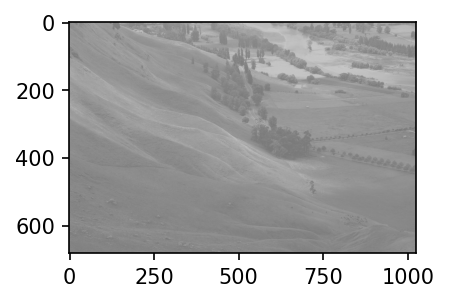

In [104]:
plt.imshow(img)

`-` 이미지를 rgb로 각각 분리하고 각 색깔들의 히스토그램을 그려보자.

In [159]:
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

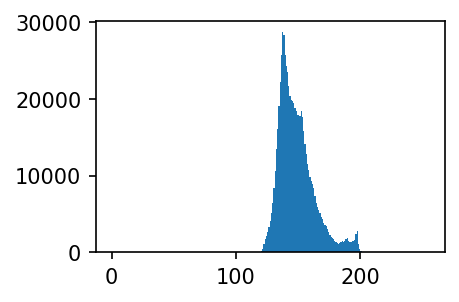

In [115]:
plt.hist(r.reshape(-1),range=(0,255),bins=255);

-   120-200 사이에 값이 몰려있음
-   만약에 120-200까지의 분포된 모양은 그대로 유지하면서 range를 0-255
    까지 늘린다면?

`-` `cv2.equalizeHist()`를 이용하여 분포의 모양은 대략적으로 유지하면서
값을 퍼트리자!

In [163]:
rr = cv2.equalizeHist(r)
gg = cv2.equalizeHist(g)
bb = cv2.equalizeHist(b)

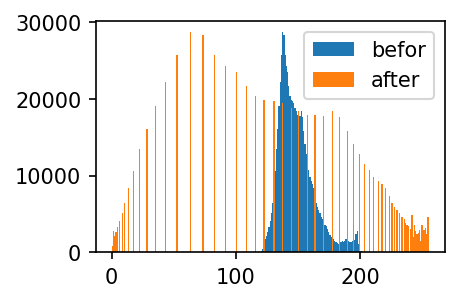

In [170]:
plt.hist(r.reshape(-1),bins=255, range=[0,255],label='befor');
plt.hist(rr.reshape(-1),bins=255,range=[0,255],label='after');
plt.legend()

`-` 변환이후의 이미지를 그려본다면?

In [171]:
img2 = np.stack([rr,gg,bb],axis=-1)

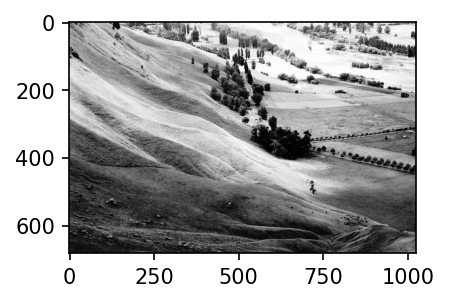

In [172]:
plt.imshow(img2)

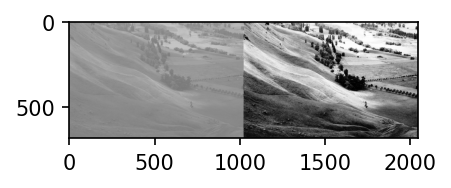

In [173]:
plt.imshow(np.concatenate([img,img2],axis=1))

# 6. 참고

`-` numpy에서 `np.stack()`, `np.concatenate()` 의 사용법을 복습하려면??

-   <https://guebin.github.io/PP2023/posts/02_DataScience/2023-04-12-6wk-2.html>

`-` numpy, pandas, matplotlib에 대한 내용을 복습하려면?

-   <https://guebin.github.io/PP2023/> 에서 06wk-1, 06wk-2, 07wk-1,
    08wk-1, 08wk-2

`-` 파이썬 전반적인 내용을 복습하려면?

-   <https://guebin.github.io/PP2023/> 에서 01wk-2 ~ 09wk-1

# 7. 숙제

`-` HE(Histogram Equalization)을 이용하여 아래주소에 저장된 이미지의
명암비를 보정하라

-   <https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/hw_img.png>

------------------------------------------------------------------------

`-` 힌트: 아래는 위의 주소의 이미지를 다운로드 하여 `img`라는 numpy
array로 저장한것 이다.

In [27]:
!wget https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/hw_img.png
img = cv2.imread('hw_img.png')
!rm hw_img.png

--2023-09-04 18:50:51--  https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/hw_img.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120618 (118K) [image/png]
Saving to: ‘hw_img.png’

hw_img.png          100%[===================>] 117.79K  --.-KB/s    in 0.01s   

2023-09-04 18:50:55 (10.8 MB/s) - ‘hw_img.png’ saved [120618/120618]


`-` 아래는 다운로드한 이미지를 시각화한 결과이다.

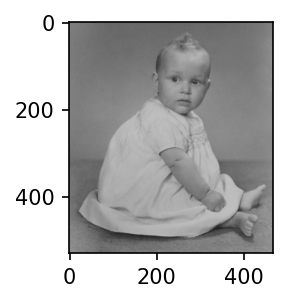

In [28]:
plt.imshow(img)

> **숙제 관련 공지**
>
> 1.  숙제는 본인이 편리한 형식으로 정리하여 LMS에 제출
>     -   화면캡쳐,`.ipynb`, `.html` 등 가능
> 2.  숙제가 너무 어려워 못 하시는 분은 질문하시면 힌트 줍니다. (필요에
>     따라서 거의 정답에 가까운 힌트를 줄 수도 있습니다)

> **파이썬을 처음 사용하는 학생을 위한 공지**
>
> 1.  기본적으로는 “파이썬프로그래밍 -\> 데이터시각화” 순서로 수강하는
>     것을 권유합니다.
> 2.  하지만 어떠한 이유로 “파이썬입문”없이 데이터시각화를 수강하셔야
>     하는 경우는 <https://guebin.github.io/PP2023/> 에서 부족한 부분을
>     공부하시고 따라오시기 바랍니다. 중간고사 이전까지의 분량정도만
>     공부하면 충분합니다.
> 3.  시간부족등의 이유로 <https://guebin.github.io/PP2023/> 의 내용을
>     공부하기 어려우시다면, 질문을 아주 많이 하시면서 따라오셔야
>     합니다. (아무리 사소한거라도 다 답변합니다. 최대한 돕겠습니다.)

Galarnyk, Michael. 2023. “Python_tutorials.”
<https://github.com/mGalarnyk/Python_Tutorials>.